In [1]:
import os
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

# Read csv file

In [4]:
# EMO_UNICODE = {
#     u':1st_place_medal:': u'\U0001F947',
#     # ...
#     u':Åland_Islands:': u'\U0001F1E6 \U0001F1FD',
# }

# UNICODE_EMO = {v: k for k, v in EMO_UNICODE.items()}

# Review를 "하나의 스트링"으로 저장

In [7]:
DATA_PATH = '../크롤링/data/'
filepath = "Omniscient Reader (Official Trailer).csv"
df = pd.read_csv(DATA_PATH+filepath)
df.head()

,videoId,Review
0,8OHzcTtoLo4,Read Omniscient Reader now:\r\nhttps://bit.ly/...
1,8OHzcTtoLo4,"Semngattt author, aku akan selalu mendukung mu..."
2,8OHzcTtoLo4,"""who are you?""\n""I'm just a reader""\nMe : then..."
3,8OHzcTtoLo4,":""))))))"
4,8OHzcTtoLo4,Han sooyong is the writer


In [8]:
# 하나의 스트링
df['Review'].values
doc = ''.join(df['Review'].values)

# 텍스트 파일로 임시 저장
filepath = "Omniscient Reader (Official Trailer).txt"
f = open(DATA_PATH + filepath, 'w')
f.write(doc)
f.close()

In [9]:
# 다시 읽어보기
filepath = "Omniscient Reader (Official Trailer).txt"
f = open(DATA_PATH + filepath, 'r')
doc1 = f.read()
f.close()
print(doc1[:1000])

Read Omniscient Reader now:

https://bit.ly/3j3IWGmSemngattt author, aku akan selalu mendukung mu 😭😘😘 ini seru banget bestie 😆"who are you?"
"I'm just a reader"
Me : then who am I?:"))))))Han sooyong is the writerI dont really read novel, specially Korean ones. But I Must say, ORV is an Amazing, well-Created Story. From all the Mangas or Novel I have read, never I feel so confused with the plot and stuff, Yet feeling hungry to know what happens next and keep reading as if its something that must be read. The ending was unexpected for me, even tho a friend of mine who introduce me to it has giving a few big spoilers(whcih I asked them to, since I need spoiler to keep reading), I never seen a Novel/Manga with an ending like that, an Ending that makes you feel as if you are the "???" Of the story..I just finished reading chapter 43, to me, it felt like the theatre owner is the author of the novel because he blushed when dokja pierced through his forehead after entering dokja's mind/ memor

# 영어 전처리

# 크롤링한 데이터이므로 HTML TAG 제거

In [10]:
doc2 = BeautifulSoup(doc1, 'html.parser').get_text() # .text
print(doc2[:1000])

Read Omniscient Reader now:

https://bit.ly/3j3IWGmSemngattt author, aku akan selalu mendukung mu 😭😘😘 ini seru banget bestie 😆"who are you?"
"I'm just a reader"
Me : then who am I?:"))))))Han sooyong is the writerI dont really read novel, specially Korean ones. But I Must say, ORV is an Amazing, well-Created Story. From all the Mangas or Novel I have read, never I feel so confused with the plot and stuff, Yet feeling hungry to know what happens next and keep reading as if its something that must be read. The ending was unexpected for me, even tho a friend of mine who introduce me to it has giving a few big spoilers(whcih I asked them to, since I need spoiler to keep reading), I never seen a Novel/Manga with an ending like that, an Ending that makes you feel as if you are the "???" Of the story..I just finished reading chapter 43, to me, it felt like the theatre owner is the author of the novel because he blushed when dokja pierced through his forehead after entering dokja's mind/ memor

# 영문자만 제외하고 남은 기호, 영문자 아닌 다른 문자를 확인
- emoji
- punctuation ( 줄임말에 사용되는 apostrophe ' 는 생략하면 안 된다.)
- 숫자
- 괄호
- 일본어 ツ
- 중국어 的笑容 都没你的甜 八月正午的阳光

In [11]:
def check_others(doc):
    import re
    pattern = re.compile(r'[a-zA-Z]') # 영문자만 가진 패턴 객체 생성
    others = pattern.sub('', doc) #  # 영문자만 가진 패턴을 삭제한 나머지
    return others

print(check_others(doc2))

   :

://./33 ,      😭😘😘     😆"  ?"
"'   "
 :    ?:"))))))        ,   .    ,    , - .         ,          ,                   .      ,                 (    ,       ),     /     ,            "???"   ..     43,  ,                        ' /  ,       ...         , ! ' ,    , ,         .  !     😁      / 
 -  
:)                               .                             .. '   !      !'    .     ?             ? , ,        .             .   ,     '    ,   '                  ?     '     ' .         ,                       ,   ,         .  ,







'   .          💀 '        ,  '      .                    . ,   .    ....       ..    551   ..               😂   \(●□●)/              .     3     .               .      .       .       ,      .     .    .  ,    .     >      '    . ,  '      .  .       .        .                         .        .           .   .나는 일본인입니다. 나는 이 작품을 사랑한다. 한국인이 일본에 나쁜 인상을 가지고 있다는 것을 알고 있습니다. 그렇지만, 이 작품 덕분에, 테스트로 이순신을 정답 할 수 있었습니다. 나는 어리석은가?  '   ,  '     .             

# 대문자를 소문자로 변환( NONE OF THESE PEOPLE TRIED) 
# 빈도 분석에서는 I'm(i'm) 은 불용어로 처리될 것이라 상관없다.

In [12]:
def convert_to_lower(doc):
    # I'm 만 제외하고 
    return doc.capitalize() # doc.lower()

doc3 = convert_to_lower(doc2)
print(doc3)

Read omniscient reader now:

https://bit.ly/3j3iwgmsemngattt author, aku akan selalu mendukung mu 😭😘😘 ini seru banget bestie 😆"who are you?"
"i'm just a reader"
me : then who am i?:"))))))han sooyong is the writeri dont really read novel, specially korean ones. but i must say, orv is an amazing, well-created story. from all the mangas or novel i have read, never i feel so confused with the plot and stuff, yet feeling hungry to know what happens next and keep reading as if its something that must be read. the ending was unexpected for me, even tho a friend of mine who introduce me to it has giving a few big spoilers(whcih i asked them to, since i need spoiler to keep reading), i never seen a novel/manga with an ending like that, an ending that makes you feel as if you are the "???" of the story..i just finished reading chapter 43, to me, it felt like the theatre owner is the author of the novel because he blushed when dokja pierced through his forehead after entering dokja's mind/ memor

# 어퍼스트로피를 포함한 punctuation 사전을 사용하지 않기 위해서 정규식 사용하여 기호 삭제

In [13]:
def remove_punctuation(doc):
    import re
    
    # 구두점 제거 
    s = re.sub(r'[.,"\'-?:!;\n\t\r]', '', doc)
    
    # 괄호 제거    
    pattern = r'\([^)]*\)'  # ()   \(   [^)]*   \)  
    s = re.sub(pattern=pattern, repl='', string=s)

    pattern = r'\[[^]]*\]'  # []   \[   [^)]*  \]
    s = re.sub(pattern=pattern, repl='', string=s)

    pattern = r'\<[^>]*\>'  # <>   \<   [^)]*   \>
    s = re.sub(pattern=pattern, repl='', string=s)

    pattern = r'\{[^}]*\}'  # {}   \{   [^)]*   \}
    s = re.sub(pattern=pattern, repl='', string=s)
  
    return s

doc4 = remove_punctuation(doc3)
print(doc4)

Read omniscient reader nowhttpsbitlyjiwgmsemngattt author aku akan selalu mendukung mu 😭😘😘 ini seru banget bestie 😆who are youim just a readerme  then who am ihan sooyong is the writeri dont really read novel specially korean ones but i must say orv is an amazing wellcreated story from all the mangas or novel i have read never i feel so confused with the plot and stuff yet feeling hungry to know what happens next and keep reading as if its something that must be read the ending was unexpected for me even tho a friend of mine who introduce me to it has giving a few big spoilerswhcih i asked them to since i need spoiler to keep reading i never seen a novelmanga with an ending like that an ending that makes you feel as if you are the  of the storyi just finished reading chapter  to me it felt like the theatre owner is the author of the novel because he blushed when dokja pierced through his forehead after entering dokjas mind memories where he saw the texts of the novelthis is probably th

#  반복어 삭제(LESHGOOOOO -> LESHGOO)

In [14]:
# from soynlp.normalizer import *
def remove_repeat_characters(doc):
    import soynlp.normalizer
    
    s = soynlp.normalizer. repeat_normalize(doc, num_repeats=2)
    return s
doc5 = remove_repeat_characters(doc4)
print(doc5)

Read omniscient reader nowhttpsbitlyjiwgmsemngattt author aku akan selalu mendukung mu 😭😘😘 ini seru banget bestie 😆who are youim just a readerme then who am ihan sooyong is the writeri dont really read novel specially korean ones but i must say orv is an amazing wellcreated story from all the mangas or novel i have read never i feel so confused with the plot and stuff yet feeling hungry to know what happens next and keep reading as if its something that must be read the ending was unexpected for me even tho a friend of mine who introduce me to it has giving a few big spoilerswhcih i asked them to since i need spoiler to keep reading i never seen a novelmanga with an ending like that an ending that makes you feel as if you are the of the storyi just finished reading chapter to me it felt like the theatre owner is the author of the novel because he blushed when dokja pierced through his forehead after entering dokjas mind memories where he saw the texts of the novelthis is probably the b

# 인코딩/디코딩 방식을 사용하여 영어만 남기고, 기타 언어들 제거
# 이모티콘도 삭제됨

In [15]:
def clean_other_languages(doc):
    result = doc.encode('utf-8').decode('ascii', 'ignore') 
    return result

doc6 = clean_other_languages(doc5)
print(doc6)

Read omniscient reader nowhttpsbitlyjiwgmsemngattt author aku akan selalu mendukung mu  ini seru banget bestie who are youim just a readerme then who am ihan sooyong is the writeri dont really read novel specially korean ones but i must say orv is an amazing wellcreated story from all the mangas or novel i have read never i feel so confused with the plot and stuff yet feeling hungry to know what happens next and keep reading as if its something that must be read the ending was unexpected for me even tho a friend of mine who introduce me to it has giving a few big spoilerswhcih i asked them to since i need spoiler to keep reading i never seen a novelmanga with an ending like that an ending that makes you feel as if you are the of the storyi just finished reading chapter to me it felt like the theatre owner is the author of the novel because he blushed when dokja pierced through his forehead after entering dokjas mind memories where he saw the texts of the novelthis is probably the best 

# Converting Emojis to Text
# https://www.kaggle.com/code/sudalairajkumar/getting-started-with-text-preprocessing/notebook
# https://github.com/NeelShah18/emot
# pip install emot --upgrade

In [86]:
# def convert_emojis(text):
#     for emot in UNICODE_EMO:
#         text = re.sub(r'('+emot+')', "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()), text)
#     return text

# doc6 = convert_emojis(doc5)
# print(doc6)

Im happy with this twist im sick of characters who try so hard to stick to the moral high ground i’m really interested to see dokja’s developement at this point since he’s clearly not going to be a ‘good’ character i don’t think he’ll be straight up evil but i’m excited to see the extent of his neutrality at the very least the people “sharing is caring” dokja i don’t care person_shrugging‍male_sign️ edit just to clarify i don’t disagree with dokja’s decision i just thought it was funny how people were trying to get him to maintain a high “moral ground” but he was just like nah this an apocalypse my dudesfinally a mc that makes the most optimal choice ive been getting bored of mcs always trying to be the herofor real though aside from the people dokja originally saved with the bugs everyone is a murderer they have a lot of audacity to be begging for their lives i’m down with dokja’s pragmatismwait i just noticed look at the panel when dokja cuts the guys arms you see that he is facing a

# nltk 이용한 토큰화

In [16]:
from nltk.tokenize import word_tokenize
clean_tokens = word_tokenize(doc6)
clean_tokens[:10]

['Read',
 'omniscient',
 'reader',
 'nowhttpsbitlyjiwgmsemngattt',
 'author',
 'aku',
 'akan',
 'selalu',
 'mendukung',
 'mu']

# 불용어 제거 + 토큰화

In [17]:
def remove_stopwords(doc):
    from nltk.corpus import stopwords 
    from nltk.tokenize import word_tokenize 

    stop_words = set(stopwords.words('english')) 

    word_tokens = word_tokenize(doc)

    result = []
    for w in word_tokens: 
        if w not in stop_words: 
            result.append(w)
    return result

doc7 = remove_stopwords(doc6)
print(doc7)

['Read', 'omniscient', 'reader', 'nowhttpsbitlyjiwgmsemngattt', 'author', 'aku', 'akan', 'selalu', 'mendukung', 'mu', 'ini', 'seru', 'banget', 'bestie', 'youim', 'readerme', 'ihan', 'sooyong', 'writeri', 'dont', 'really', 'read', 'novel', 'specially', 'korean', 'ones', 'must', 'say', 'orv', 'amazing', 'wellcreated', 'story', 'mangas', 'novel', 'read', 'never', 'feel', 'confused', 'plot', 'stuff', 'yet', 'feeling', 'hungry', 'know', 'happens', 'next', 'keep', 'reading', 'something', 'must', 'read', 'ending', 'unexpected', 'even', 'tho', 'friend', 'mine', 'introduce', 'giving', 'big', 'spoilerswhcih', 'asked', 'since', 'need', 'spoiler', 'keep', 'reading', 'never', 'seen', 'novelmanga', 'ending', 'like', 'ending', 'makes', 'feel', 'storyi', 'finished', 'reading', 'chapter', 'felt', 'like', 'theatre', 'owner', 'author', 'novel', 'blushed', 'dokja', 'pierced', 'forehead', 'entering', 'dokjas', 'mind', 'memories', 'saw', 'texts', 'novelthis', 'probably', 'best', 'official', 'webtoon', 'trai

# nltk.FreqDist를 이용한 빈도 순위

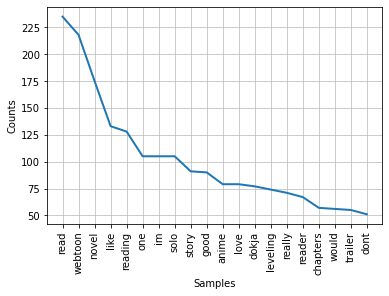

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
import nltk
fd=nltk.FreqDist(doc7)
fd.plot(20, cumulative=False)

In [20]:
most_common_list = fd.most_common(30)
most_common_list

[('read', 235),
 ('webtoon', 218),
 ('novel', 175),
 ('like', 133),
 ('reading', 128),
 ('one', 105),
 ('im', 105),
 ('solo', 105),
 ('story', 91),
 ('good', 90),
 ('anime', 79),
 ('love', 79),
 ('dokja', 77),
 ('leveling', 74),
 ('really', 71),
 ('reader', 67),
 ('chapters', 57),
 ('would', 56),
 ('trailer', 55),
 ('dont', 51),
 ('get', 51),
 ('best', 50),
 ('know', 48),
 ('mc', 48),
 ('ive', 48),
 ('cant', 46),
 ('na', 46),
 ('already', 46),
 ('manhwa', 44),
 ('make', 42)]

# wordcloud 이용한 빈도 순위 보여주기

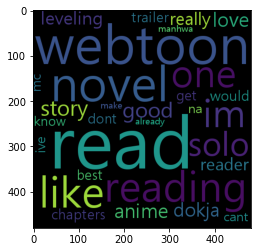

In [21]:
def draw_wordcloud(dict_word_cnt):
    from wordcloud import WordCloud
    wc = WordCloud(font_path='malgun', width=480, height=480, background_color='black')
    gen = wc.generate_from_frequencies(dict_word_cnt)
    plt.figure()
    plt.imshow(gen)
    wc.to_file("most_common_100.png")

draw_wordcloud(dict(most_common_list))

In [25]:
from nltk.corpus import stopwords  

stopwords.fileids()
english_stops = set(stopwords.words('english'))
tokens = [word for word in doc7 if word not in english_stops]
tokens

['Read',
 'omniscient',
 'reader',
 'nowhttpsbitlyjiwgmsemngattt',
 'author',
 'aku',
 'akan',
 'selalu',
 'mendukung',
 'mu',
 'ini',
 'seru',
 'banget',
 'bestie',
 'youim',
 'readerme',
 'ihan',
 'sooyong',
 'writeri',
 'dont',
 'really',
 'read',
 'novel',
 'specially',
 'korean',
 'ones',
 'must',
 'say',
 'orv',
 'amazing',
 'wellcreated',
 'story',
 'mangas',
 'novel',
 'read',
 'never',
 'feel',
 'confused',
 'plot',
 'stuff',
 'yet',
 'feeling',
 'hungry',
 'know',
 'happens',
 'next',
 'keep',
 'reading',
 'something',
 'must',
 'read',
 'ending',
 'unexpected',
 'even',
 'tho',
 'friend',
 'mine',
 'introduce',
 'giving',
 'big',
 'spoilerswhcih',
 'asked',
 'since',
 'need',
 'spoiler',
 'keep',
 'reading',
 'never',
 'seen',
 'novelmanga',
 'ending',
 'like',
 'ending',
 'makes',
 'feel',
 'storyi',
 'finished',
 'reading',
 'chapter',
 'felt',
 'like',
 'theatre',
 'owner',
 'author',
 'novel',
 'blushed',
 'dokja',
 'pierced',
 'forehead',
 'entering',
 'dokjas',
 'mind'

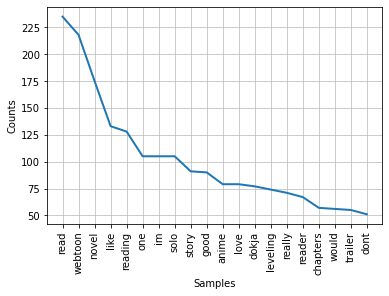

In [26]:
from nltk import Text

from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
#words = retokenize.tokenize(doc6)
#text = Text(retokenize.tokenize(doc6))
text = Text(tokens)
text.plot(20)
plt.show()

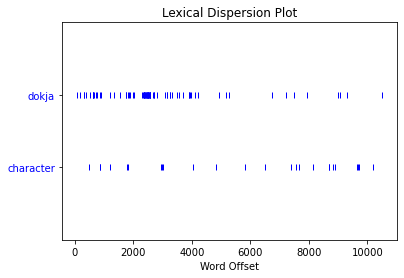

In [28]:
# dispersion_plot 메서드는 단어가 사용된 위치를 시각화한다. 
# 각 등장인물에 대해 적용하면 다음과 같은 결과를 얻는다.

"""
김독자
전지적 독자시점의 주인공. 자세한 내용은 해당 문서 참고.
유상아
독자의 회사 동료. 퇴근길 전철에서 독자와 얘기하다 세상의 변화에 말려든다. 자세한 내용은 해당 문서 참고.
이길영
독자와 지하철을 같이 타고있던 소년. 자세한 내용은 해당 문서 참고.
한명오
독자의 회사 상사. 유상아를 노리고 퇴근길 전철에 탔다가 세상의 변화에 말려든다. 자세한 내용은 해당 문서 참고.
한수영
독자처럼 멸살법의 지식을 토대로 암약한다. 자세한 내용은 해당 문서 참고.

"""
text.dispersion_plot(["dokja", "character"])

In [29]:
# concordance 메서드로 단어가 사용된 위치를 직접 표시하면 문맥(context)이 어떤지 볼 수 있다. 
# 여기에서 문맥은 해당 단어의 앞과 뒤에 사용된 단어를 뜻한다.

text.concordance("Dokja")

Displaying 25 of 77 matches:
e theatre owner author novel blushed dokja pierced forehead entering dokjas min
 nowim dying curiousity actually kim dokja one thing even readers still unaware
d mind truly blown never forget miss dokja already much rest toounpopular opini
niscient reader solo levellingi love dokja cuz hes sly clever plus cant get eno
moting every person world knows love dokja muchdokja pretty much anos voldigoad
imated one daythe best story best mc dokja driving crazyy afbafhsfhsfjtahgcvdva
ll hardto ppl doesnt ship jungheok x dokja say dokja x sooyoung dokja x sangah 
ppl doesnt ship jungheok x dokja say dokja x sooyoung dokja x sangah better ima
ungheok x dokja say dokja x sooyoung dokja x sangah better imagine jungheok gir
t characters best part chemistry kim dokja yoo jong huyk hahai yoo junghyeokrea
ious story cant guess happen nextkim dokja unpredictable love iti love youi sho
eally feels like theres person named dokja authorsthe novel writers shing shong
acter devel

In [30]:
text.concordance("character")

Displaying 25 of 25 matches:
ent chapter reading web novel main character relateable reading novel cope what
cient reader complex story amazing character development main character kim dok
amazing character development main character kim dokja doesnt punch way every s
me xdi like novel especially dokja character god watched trailer ad year ago li
ltaneously overpowered overpowered character ive seen lol hes interesting doesn
appened apocalypse came underlying character burst took controlconstellation de
ext ever tried imagine series main character series novels satisfy worth read i
 among characters mean really love character actually ship dokjaam onebtw wait 
 characyers like yjh also annoying character named h protagonists paradox among
r omnisient readers mc overpowered character adventage knows original story sol
eate intro pleasecan say love main character story literally could saved everyo
commercial yetalternate title side character tries become usefulok wan na say d
reading web

# 빈도 분석

In [85]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [86]:
import keras
keras.__version__

'2.10.0'

In [87]:
import gensim
gensim.__version__

'4.2.0'

In [88]:
import sklearn
sklearn.__version__

'1.1.2'

In [89]:
import nltk
nltk.__version__

'3.6.1'

In [90]:
import konlpy
konlpy.__version__

'0.6.0'